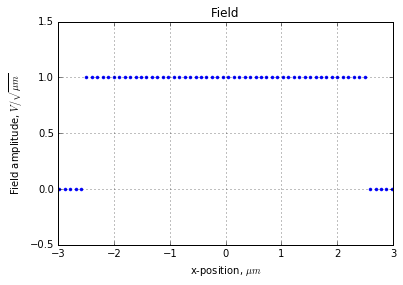

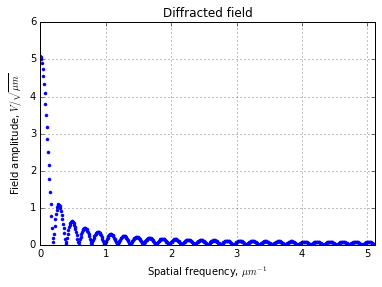

In [59]:
'''
1. Look at the FDTD diffraction and interface simulation video at 
https://www.youtube.com/watch?v=6QLj8_f9QYg&spfreload=5

2. Download, install and play with program yourself
http://lnmaurer.github.io/Interference-Inference-Interface/

The program is in lnmaurer-Interference-Inference-Interface folder. 
Run the script with python2 iii.py comand

3. Use the Fourier transform approximation of Fraunhofer diffraction to simulate the 
diffraction patterns of some rectengular, circular, and other shaped apertures.

[Rememeber to plot intensity which is the square of the magnitude of the complex amplitude G(x,y)]
[Hint: to get started try 1/(λz) = 1, e.g. λ = 532 * x^-9 m and z = 1.879699 * 10^6 m. ]

'''
"""
Following 1D diffraction theory, for a better understanding:
http://kmdouglass.github.io/posts/approximating-diffraction-patterns-of-rectangular-apertures-with-the-fft.html

I simulate slit diffraction with the FFT. Diffraction refers to various phenomena which occur 
when a wave encounters an obstacle or a slit. It is defined as the bending of light around the 
corners of an obstacle or aperture into the region of geometrical shadow of the obstacle. 


"""
%matplotlib inline
import numpy as np
import pylab
import matplotlib.pyplot as plt
import math
from scipy import misc
from scipy.fftpack import fft
from scipy.fftpack import fftshift, ifftshift

amplitude    = 1     # Volt / sqrt(micron)
slitWidth    = 5     # microns
wavelength   = 0.532 # microns
propDistance = 10000 # microns (= 10 mm)

x     = np.linspace(-50, 50, num = 1024)
field = np.zeros(x.size, dtype='complex128') # Ensure the field is complex
field[np.logical_and(x > -slitWidth / 2, x <= slitWidth / 2)] = amplitude + 0j

plt.title("Field")
plt.plot(x, np.abs(field), '.')
plt.xlabel(r'x-position, $\mu m$')
plt.ylabel(r'Field amplitude, $V / \sqrt{\mu m}$')
plt.xlim((-3, 3))
plt.ylim((-0.5, 1.5))
plt.grid(True)
plt.show()


dx = x[1] - x[0] # Spatial sampling period, microns
fS = 1 / dx      # Spatial sampling frequency, units are inverse microns
f  = (fS / x.size) * np.arange(0, x.size, step = 1) # inverse microns

diffractedField = fft(dx * fftshift(field)) # The field must be rescaled by dx to get the correct units

# Plot the field up to the Nyquist frequency, fS / 2
plt.title("Diffracted field")
plt.plot(f[f <= fS / 2], np.abs(diffractedField[f <= fS / 2]), '.', linewidth = 2)
plt.xlim((0, fS / 2))
plt.xlabel(r'Spatial frequency, $\mu m^{-1}$')
plt.ylabel(r'Field amplitude, $V / \sqrt{\mu m}$')
plt.grid(True)
plt.show()




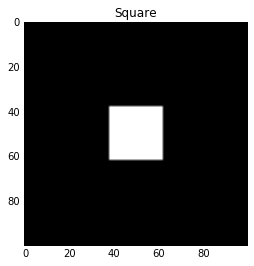

[[ 2.34604106+0.j          2.12929053+0.06691565j  1.55065304+0.09755882j
  ...,  0.79679166-0.07531899j  1.55065304-0.09755882j
   2.12929053-0.06691565j]
 [ 2.34604106+0.j          2.12929053+0.06691565j  1.55065304+0.09755882j
  ...,  0.79679166-0.07531899j  1.55065304-0.09755882j
   2.12929053-0.06691565j]
 [ 2.34604106+0.j          2.12929053+0.06691565j  1.55065304+0.09755882j
  ...,  0.79679166-0.07531899j  1.55065304-0.09755882j
   2.12929053-0.06691565j]
 ..., 
 [ 2.34604106+0.j          2.12929053+0.06691565j  1.55065304+0.09755882j
  ...,  0.79679166-0.07531899j  1.55065304-0.09755882j
   2.12929053-0.06691565j]
 [ 2.34604106+0.j          2.12929053+0.06691565j  1.55065304+0.09755882j
  ...,  0.79679166-0.07531899j  1.55065304-0.09755882j
   2.12929053-0.06691565j]
 [ 2.34604106+0.j          2.12929053+0.06691565j  1.55065304+0.09755882j
  ...,  0.79679166-0.07531899j  1.55065304-0.09755882j
   2.12929053-0.06691565j]]


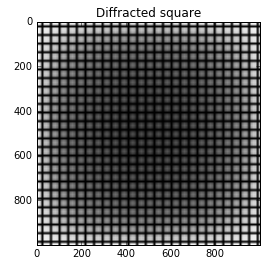

In [66]:
#The code from LAB2 with Discrete FFT 

from scipy.fftpack import fft2, ifft2, fftshift, ifftshift, fftfreq
# This is confusing but for some reason these methods are in NumPy only, not SciPy
from numpy.fft import rfft2, irfft2, rfftfreq
import matplotlib.cm as cm
# Rectangle:
start_time = -2
stop_time = 2
time_to_plot = 4 # seconds
sample_rate = 25 # In Hz, the number of samples per second
total_number_of_sample = sample_rate * time_to_plot #+ 1 #Odd numbers get you zero with linspace
t = np.linspace(start_time, stop_time, total_number_of_sample) #Odd numbers get you zero with linspace

# Graphing helper function
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plt.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

rect = np.linspace(0,1,total_number_of_sample)
for i in range(len(t)):
    if((t[i] > -0.5) & (t[i] < 0.5)):
        rect[i] = 1
    elif((t[i] == 0.5) &(t[i] == -0.5)):
        rect[i] = 0.5
    else:
        rect[i] = 0


rect1 = np.asmatrix(rect)
rect2D=np.dot(np.transpose(rect1),rect1)

plt.title("Square")
plt.imshow(rect2D, cmap=cm.Greys_r)
plt.show()
# Get the FT 


diffractedField = dx * fft(fftshift(rect2D)) # The field must be rescaled by dx to get the correct units

print(diffractedField)
F = np.absolute(F); # Get the magnitude
#F = F*F
F = np.log(F+1); # Use log, for perceptual scaling, and +1 since log(0) is undefined
#F = mat2gray(F); # Use mat2gray to scale the image between 0 and 1


#plt.title("Diffracted square")
#plt.plot(diffractedRect2D)
#plt.show() 
test = np.absolute(diffractedRect2D)
plt.title("Diffracted square")
plt.imshow(F, cmap=cm.Greys_r)
plt.show()

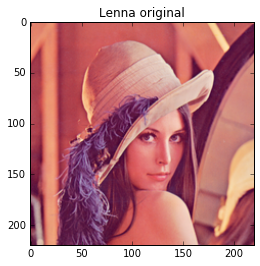

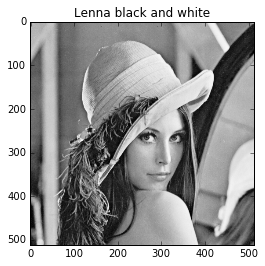

In [11]:
from PIL import Image
img = Image.open('./lenna.png')
plt.title("Lenna original")
plt.imshow(img)
plt.show() 
#We work with black and white version of the photo
img_gray = Image.open('./lenna_bw.png')
plt.title("Lenna black and white")
plt.imshow(img_gray, cmap=cm.Greys_r)
plt.show() 